In [228]:
# Dependencies
import numpy as np
import tweepy
import time
import json
from config import consumer_key, consumer_secret, access_token, access_token_secret
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [229]:
def twitter_followers( res_name ):
   # Setup Tweepy API Authentication
    auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
    auth.set_access_token(access_token, access_token_secret)
    api = tweepy.API(auth, parser=tweepy.parsers.JSONParser())
   #Get the  followers count 
    user = api.get_user(res_name)
    return user['followers_count']


In [232]:
#Import Nutrition Facts  from file 
# load CSV
nutr_file = "Nutrition Data for Fast Food 2017.csv"
nutr_pd = pd.read_csv(nutr_file, encoding='iso-8859-1', low_memory=False)
nutr_pd.rename(columns={'Fast_Food_Restaurant': 'Restaurant_Name'}, inplace=True)
nutr_pd

,Restaurant_Name,Item,Type,Serving_Size,Calories,Total_Fat,Saturated_Fat,Trans_Fat,Sodium,Carbs,Sugars,Protein
0,McDonald's,Hamburger,Burger,98,240,8.0,3.0,0.0,480,32.0,6.0,12.0
1,McDonald's,Cheeseburger,Burger,113,290,11.0,5.0,0.5,680,33.0,7.0,15.0
2,McDonald's,Big Mac,Burger,211,530,27.0,10.0,1.0,960,47.0,9.0,24.0
3,McDonald's,Quarter Pounder with Cheese,Burger,202,520,26.0,12.0,1.5,1100,41.0,10.0,30.0
4,McDonald's,Bacon Clubhouse Burger,Burger,270,720,40.0,15.0,1.5,1470,51.0,14.0,39.0
5,McDonald's,Double Quarter Pounder with Cheese,Burger,283,750,43.0,19.0,2.5,1280,42.0,10.0,48.0
6,McDonald's,Chocolate Shake (12oz),Milkshake,257,530,15.0,10.0,1.0,160,86.0,63.0,11.0
7,McDonald's,Premium Crispy Chicken Classic Sandwich,Breaded Chicken Sandwich,213,510,22.0,3.5,0.0,990,55.0,10.0,24.0
8,McDonald's,Premium Grilled Chicken Classic Sandwich,Grilled Chicken Sandwich,200,350,9.0,2.0,0.0,820,42.0,8.0,28.0
9,McDonald's,Chicken McNuggets¬ (4 piece),Chicken Nuggets,65,190,12.0,2.0,0.0,360,12.0,0.0,9.0


([<matplotlib.axis.XTick at 0x1a2771f198>,
 <a list of 12 Text xticklabel objects>)

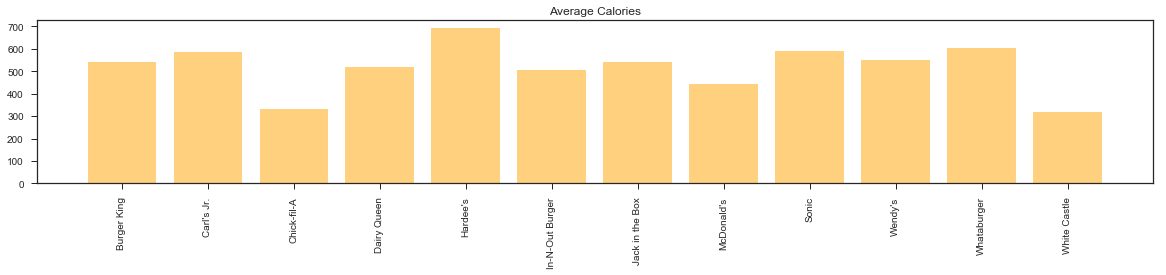

In [238]:
nutr_pd_gr=nutr_pd.groupby(['Restaurant_Name']).mean()
x_axis = np.arange(len(nutr_pd_gr))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, nutr_pd_gr["Calories"], color='orange', alpha=0.5, align="edge")
plt.title('Average Calories')
plt.xticks(tick_locations, nutr_pd_gr.index.values, rotation="vertical")
    

In [237]:
nutr_pd_gr=nutr_pd.groupby(['Restaurant_Name']).mean()
nutr_pd_gr

,Serving_Size,Calories,Total_Fat,Saturated_Fat,Trans_Fat,Sodium,Carbs,Sugars,Protein
Restaurant_Name,,,,,,,,,
Burger King,218.000000,540.000000,29.909091,9.545455,0.863636,817.272727,44.272727,14.000000,24.272727
Carl's Jr.,249.923077,585.307692,34.238462,12.684615,0.930769,1085.923077,49.853846,12.915385,27.500000
Chick-fil-A,184.600000,330.000000,12.300000,4.700000,0.200000,654.000000,39.200000,18.500000,16.800000
Dairy Queen,217.545455,516.363636,27.090909,9.681818,0.681818,1001.818182,43.181818,12.090909,25.090909
Hardee's,291.166667,691.666667,39.666667,13.041667,NaN,1399.166667,53.666667,14.916667,29.833333
In-N-Out Burger,257.400000,505.000000,26.800000,11.400000,0.500000,731.000000,48.600000,19.000000,18.400000
Jack in the Box,200.615385,541.538462,29.384615,10.692308,1.076923,1082.307692,43.000000,11.692308,24.153846
McDonald's,180.636364,441.818182,20.363636,7.545455,0.727273,766.363636,42.818182,12.454545,22.000000
Sonic,233.545455,588.181818,33.818182,12.409091,0.863636,926.363636,44.272727,10.000000,26.818182


([<matplotlib.axis.XTick at 0x1a20c2cb38>,
 <a list of 12 Text xticklabel objects>)

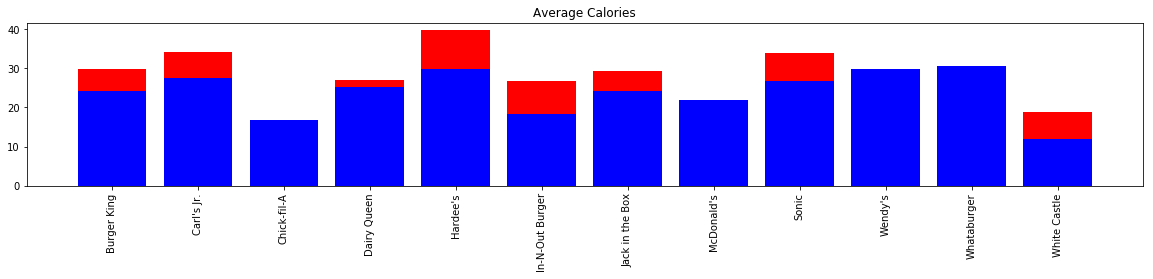

In [204]:
nutr_pd_gr=nutr_pd.groupby(['Restaurant_Name']).mean()
x_axis = np.arange(len(nutr_pd_gr))
tick_locations = [value+0.4 for value in x_axis]
plt.figure(figsize=(20,3))
plt.bar(x_axis, nutr_pd_gr["Total_Fat"], color='r',align="edge")
plt.bar(x_axis, nutr_pd_gr["Protein"], color='b',align="edge" )
plt.title('Average Calories')
plt.xticks(tick_locations, nutr_pd_gr.index.values, rotation="vertical")
    

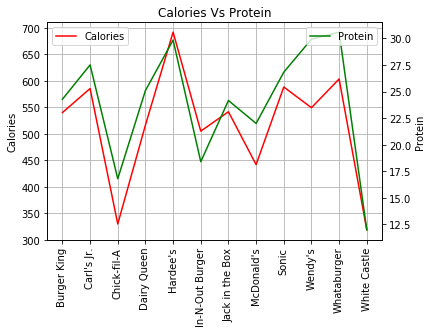

In [189]:
plt.title('Calories Vs Protein')      #Plot the title
x_axis = np.arange(len(nutr_pd_gr))
plt.grid(True)  #Turn the grid on
plt.ylabel('Calories')   #Set ylabels
plt.plot(nutr_pd_gr.index.values,nutr_pd_gr['Calories'] , color='red' ,label='Calories')   
plt.xticks(tick_locations, nutr_pd_gr.index.values,rotation="vertical")
plt.legend(loc='upper left')                    #plot the legend
plt2=plt.twinx()                                #Create a second y axis
# #     plt.ylim(93450,93525)                           #Set limits of second y axis- adjust to readings you are getting
plt2.plot(nutr_pd_gr.index.values,nutr_pd_gr['Protein'] ,color= 'green',label='Protein') #plot pressure data
plt2.set_ylabel('Protein')                    #label second y axis
         #Force matplotlib to NOT autoscale y axis
plt2.legend(loc='upper right')                  #plot the legend

In [177]:
#Import Nutrition Facts  from file 
# load CSV
nutr_file = "Nutrition Data for Fast Food 2017.csv"
tweet_hand_file = "RestaurantTwitterName.csv"
nutr_pd = pd.read_csv(nutr_file, encoding='iso-8859-1', low_memory=False)
restu_list=nutr_pd.Fast_Food_Restaurant.unique()
tweet_hand_pd = pd.read_csv(tweet_hand_file, encoding='iso-8859-1', low_memory=False)
tweet_hand_pd.rename(columns={'Restaurant Name': 'Restaurant_Name', 'Twitter Name': 'Twitter_Name'}, inplace=True)
tweet_hand_pd['Twitter_count']=''
tweet_hand_pd=tweet_hand_pd.set_index(['Twitter_Name'])
for index, row in tweet_hand_pd.iterrows():
    tweet_hand_pd.loc[index,'Twitter_count'] = twitter_followers(index)
tweet_hand_pd.sort_values(by=['Restaurant_Name'],inplace=True)
print(tweet_hand_pd)

               Restaurant_Name Twitter_count
Twitter_Name                                
@BurgerKing        Burger King       1618470
@CarlsJr            Carl's Jr.         96613
@ChickfilA         Chick-fil-A        916376
@DairyQueen        Dairy Queen        469127
@Hardees              Hardee's         68717
@innoutburger  In-N-Out Burger         46054
@JackBox       Jack in the Box         94963
@McDonalds          McDonald's       3581412
@sonicdrivein            Sonic        359910
@Wendys                Wendy's       2493990
@Whataburger       Whataburger       1263079
@WhiteCastle      White Castle         91743


In [133]:
combined = pd.merge(tweet_hand_pd, nutr_pd, on='Restaurant_Name',left_index=True)
combined2=combined.groupby(['Restaurant_Name', 'Type']).mean()
combined2.head()


Serving_Size    Calories  Total_Fat  \
Restaurant_Name Type                                                            
Burger King     Breaded Chicken Sandwich         248.0  660.000000  40.000000   
                Burger                           234.0  626.666667  38.333333   
                Chicken Nuggets                   58.0  170.000000  11.000000   
                French Fries                     128.0  320.000000  14.000000   
                Grilled Chicken Sandwich         217.0  420.000000  18.000000   

                                          Saturated_Fat  Trans_Fat  \
Restaurant_Name Type                                                 
Burger King     Breaded Chicken Sandwich            7.0   0.000000   
                Burger                             13.5   1.583333   
                Chicken Nuggets                     1.5   0.000000   
                French Fries                        2.5   0.000000   
                Grilled Chicken Sandwich            3.0   0.000000   

                                               Sodium      Carbs    Sugars  \
Restaurant_Name Type                                                         
Burger King     Breaded Chicken Sandwich  1220.000000  49.000000  7.000000   
                Burger                     963.333333  40.833333  8.833333   
                Chicken Nuggets            310.000000  11.000000  0.000000   
                French Fries               480.000000  44.000000  0.000000   
                Grilled Chicken Sandwich   700.000000  35.000000  6.000000   

                                          Protein  
Restaurant_Name Type                               
Burger King     Breaded Chicken Sandwich     26.0  
                Burger                       30.5  
                Chicken Nuggets               8.0  
                French Fries                  4.0  
                Grilled Chicken Sandwich     32.0

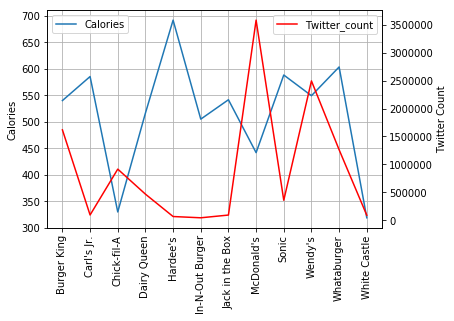

In [191]:
x_axis = np.arange(len(nutr_pd_gr))
plt.grid(True)  #Turn the grid on
plt.ylabel('Calories')   #Set ylabels
plt.plot(nutr_pd_gr.index.values,nutr_pd_gr['Calories'] , label='Calories')   
plt.xticks(tick_locations, nutr_pd_gr.index.values, rotation="vertical")
plt.legend(loc='upper left')                    #plot the legend
plt2=plt.twinx()                                #Create a second y axis
plt2.plot(tweet_hand_pd['Restaurant_Name'],tweet_hand_pd['Twitter_count'] ,color='red',label='Twitter_count') #plot pressure data
plt2.set_ylabel('Twitter Count')                    #label second y axis     #Force matplotlib to NOT autoscale y axis
plt2.legend(loc='upper right')                  #plot the legend

In [235]:
import seaborn as sns; sns.set(style="ticks", color_codes=True)
g = sns.pairplot(nutr_pd_gr.loc[nutr_pd_gr['Type'] == "Burger"],x_vars =['Protein','Carbs'],y_vars =['Protein','Carbs'],kind="reg")

KeyError: 'Type'

In [ ]:
# Yelp api 